# Projeto 3 

## Manuel Castanares & Luis Filipe Carrete



In [83]:
import math
import pandas as pd
from random import shuffle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm, probplot
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [13]:
dados = pd.read_csv('IMDB-Movie-Data.csv') #Importando dataframe

### Introdução:

	Uma das formas de entretenimento que mais cresceu nas últimas décadas é o filme. De acordo com um estudo da “Motion Picture Association of America” a receita da indústria de filmes no mundo aumentou de 5,6 Bilhões de Dólares para 14,9 em 2016. Por conta disso, também houve um aumento de produção de filmes. Assim, a escolha de qual filme deve ser assistido ficou cada vez mais difícil, o que levou a criação de “ratings” para classificar a qualidade do filme. Dessa maneira, o espectador consegue ver o ‘“rating” de um filme, e com isso decidir se vale a pena o assistir ou não. Um dos classificadores mais respeitados na indústria é IMDB, onde os usuários registrados conseguem avaliar os filmes, e dar uma nota de 0-10. 
	No intuito de ajudar os produtores de filmes, decidimos criar um modelo que consegue prever o “rating” de IMDB de um filme. Assim, os produtores conseguem fazer escolhas, em relação a algumas das propriedades do filme, optimizando a nota do filme no IMDB. Para construir o modelo, utilizamos uma data base retirada do Kaggle.


## Análise Exploratória: 

Para construir o nosso modelo, primeiro foi necessário arrumar o data base. Para determinar a importância do gênero de um filme, em relação ao “rating”, decidimos separar os gêneros (usando um “split”) em três categorias; gênero 1 (principal), gênero 2 e gênero 3. Feita a separação dos gêneros, foi importante ver a média da nota do “rating” de acordo com cada gênero. Assim, ficou claro que o gênero do filme afeta na nota dele.


In [70]:
dados[['genero1','genero2','genero3']] = dados.Genre.str.split(",",expand=True,)



In [15]:
dados.genero1.value_counts()
top_genero = ['Action', 'Drama', 'Comedy', 'Adventure', 'Crime']


In [16]:
dados_drama = dados.loc[(dados.genero1 == "Drama") | (dados.genero2 == "Drama") | (dados.genero3 == "Drama")]

media_drama = dados_drama.Rating.mean()

dados_action = dados.loc[(dados.genero1 == "Action") | (dados.genero2 == "Action") | (dados.genero3 == "Action")]

media_action = dados_action.Rating.mean()

dados_comedy = dados.loc[(dados.genero1 == "Comedy") | (dados.genero2 == "Comedy") | (dados.genero3 == "Comedy")]

media_comedy = dados_comedy.Rating.mean()

dados_adv = dados.loc[(dados.genero1 == "Adventure") | (dados.genero2 == "Adventure") | (dados.genero3 == "Adventure")]

media_adv = dados_adv.Rating.mean()

dados_thri = dados.loc[(dados.genero1 == "Crime") | (dados.genero2 == "Crime") | (dados.genero3 == "Crime")]

media_thri = dados_thri.Rating.mean()

medias=[media_drama, media_action, media_comedy, media_adv, media_thri]




<function matplotlib.pyplot.show(*args, **kw)>

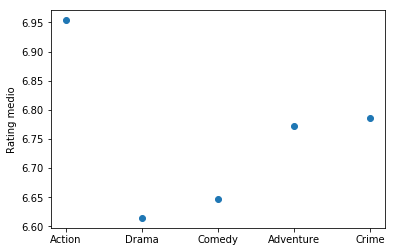

In [17]:
x = np.arange(1,6,1)

plt.plot(x, medias, "o")
plt.ylabel("Rating medio")
plt.xticks(x, top_genero)
plt.show


Os dados acima mostram que a média das notas de filmes que têm como gênero “Ação”, é a maior de todas (6,95 de 10). O gênero que tem a menor média é “Drama” com uma nota de 6,62.

In [93]:
dados_na = dados.dropna() #Criando um novo dataset sem os valores nulos.


O próximo passo da análise exploratória foi fazer um boxplot da variável alva (“rating”) e das outras variáveis quantitativas. Isso foi feito para auxiliar no entendimento das distribuições de cada variável. Além disso, consegue-se ver se a variável conta com muitos “outliers”.

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: Rating, dtype: float64

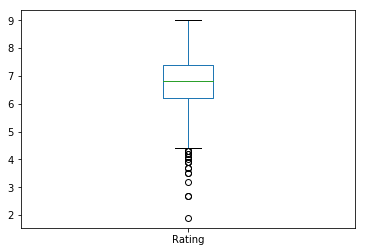

In [19]:
r = dados["Rating"]
r.plot.box()
r.describe()

O boxplot do “rating” mostra que essa variável tem uma assimetria à esquerda. Também consegue-se determinar que há uma existência significativa de “outliers”. Percebe-se que a média de “ratings” é de 6,72 pontos de 10, com um desvio padrão de 0,94 pontos. 

Plotando o boxplot do revenue para entender seu comportamento.

count    580.000000
mean      98.118810
std      113.027008
min        0.000000
25%       21.150000
50%       58.975000
75%      134.520000
max      936.630000
Name: Revenue (Millions), dtype: float64

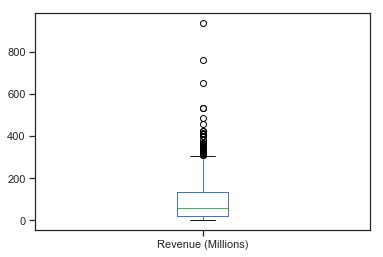

In [94]:
dados_na["Revenue (Millions)"].plot.box()
dados_na["Revenue (Millions)"].describe()


Plotando runtime

count    580.000000
mean     116.068966
std       18.360205
min       66.000000
25%      102.000000
50%      114.000000
75%      127.000000
max      187.000000
Name: Runtime (Minutes), dtype: float64

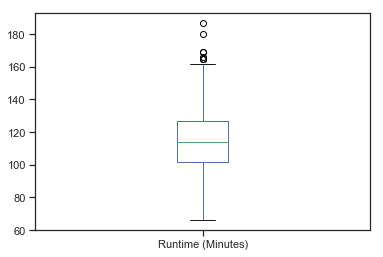

In [95]:
dados_na["Runtime (Minutes)"].plot.box()
dados_na["Runtime (Minutes)"].describe()

Votes

Plotando o boxplot de votes para entender melhor os dados.

count    5.800000e+02
mean     2.116641e+05
std      1.970955e+05
min      1.780000e+02
25%      7.271225e+04
50%      1.563625e+05
75%      2.975422e+05
max      1.791916e+06
Name: Votes, dtype: float64

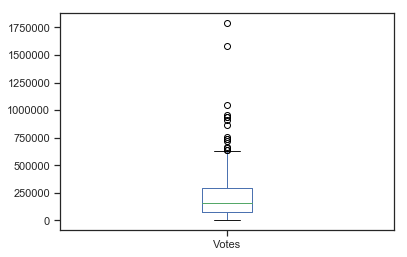

In [96]:
dados_na["Votes"].plot.box()
dados_na["Votes"].describe()


In [35]:
dados.columns
x_var = ["Year","Runtime (Minutes)","Rating","Votes","Revenue (Millions)","Metascore"]
y_var = x_var

C:\Users\lfcsa\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\lfcsa\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


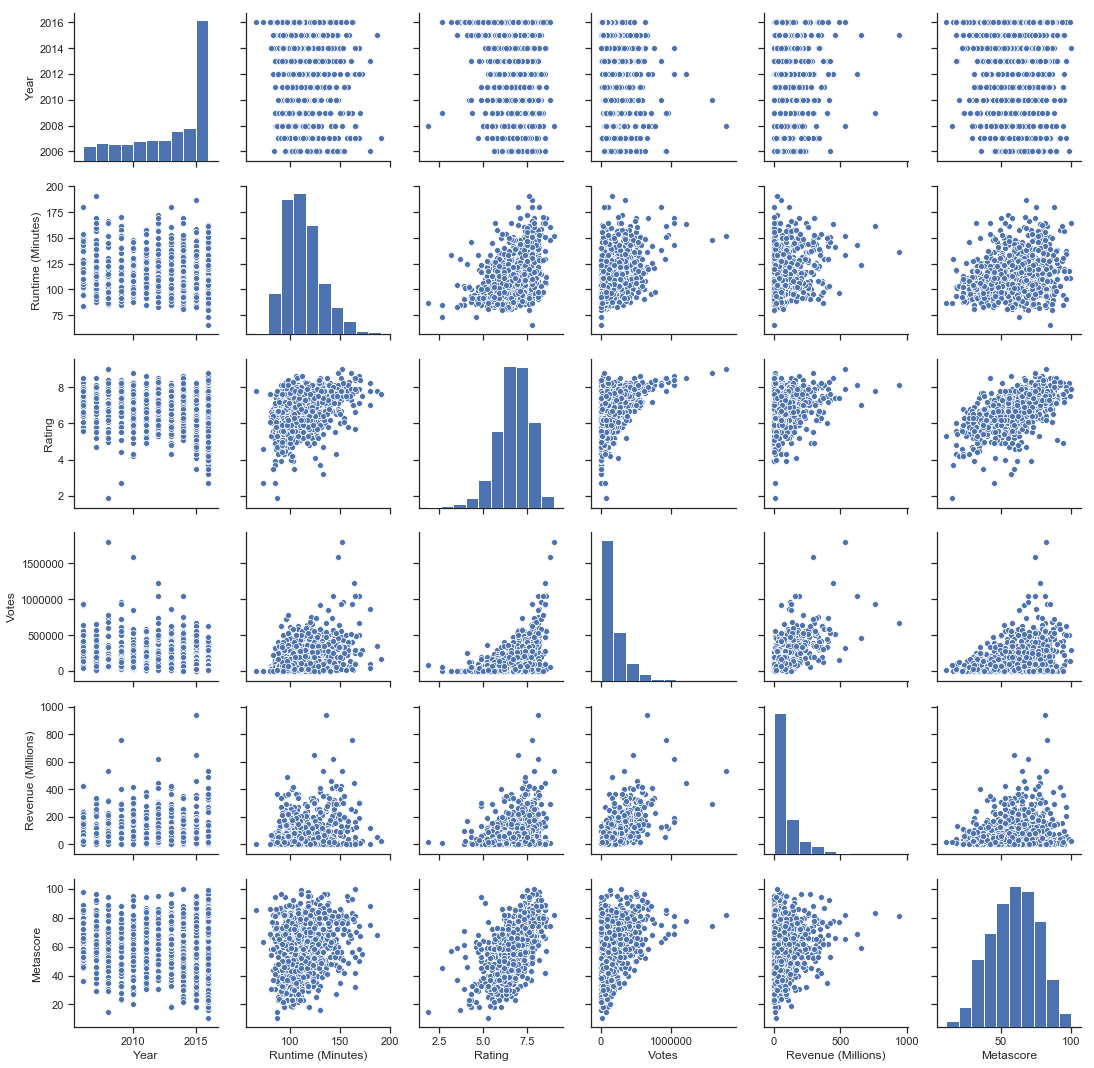

In [36]:
#A primeira analise somente de variaveis quantitativas.

sns.set(style="ticks")

sns.pairplot(dados, x_vars=x_var, y_vars=y_var)

In [37]:
dados_na["votes_log"] = np.log(dados.Votes)
dados["votes_log"] = np.log(dados.Votes)

C:\Users\lfcsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


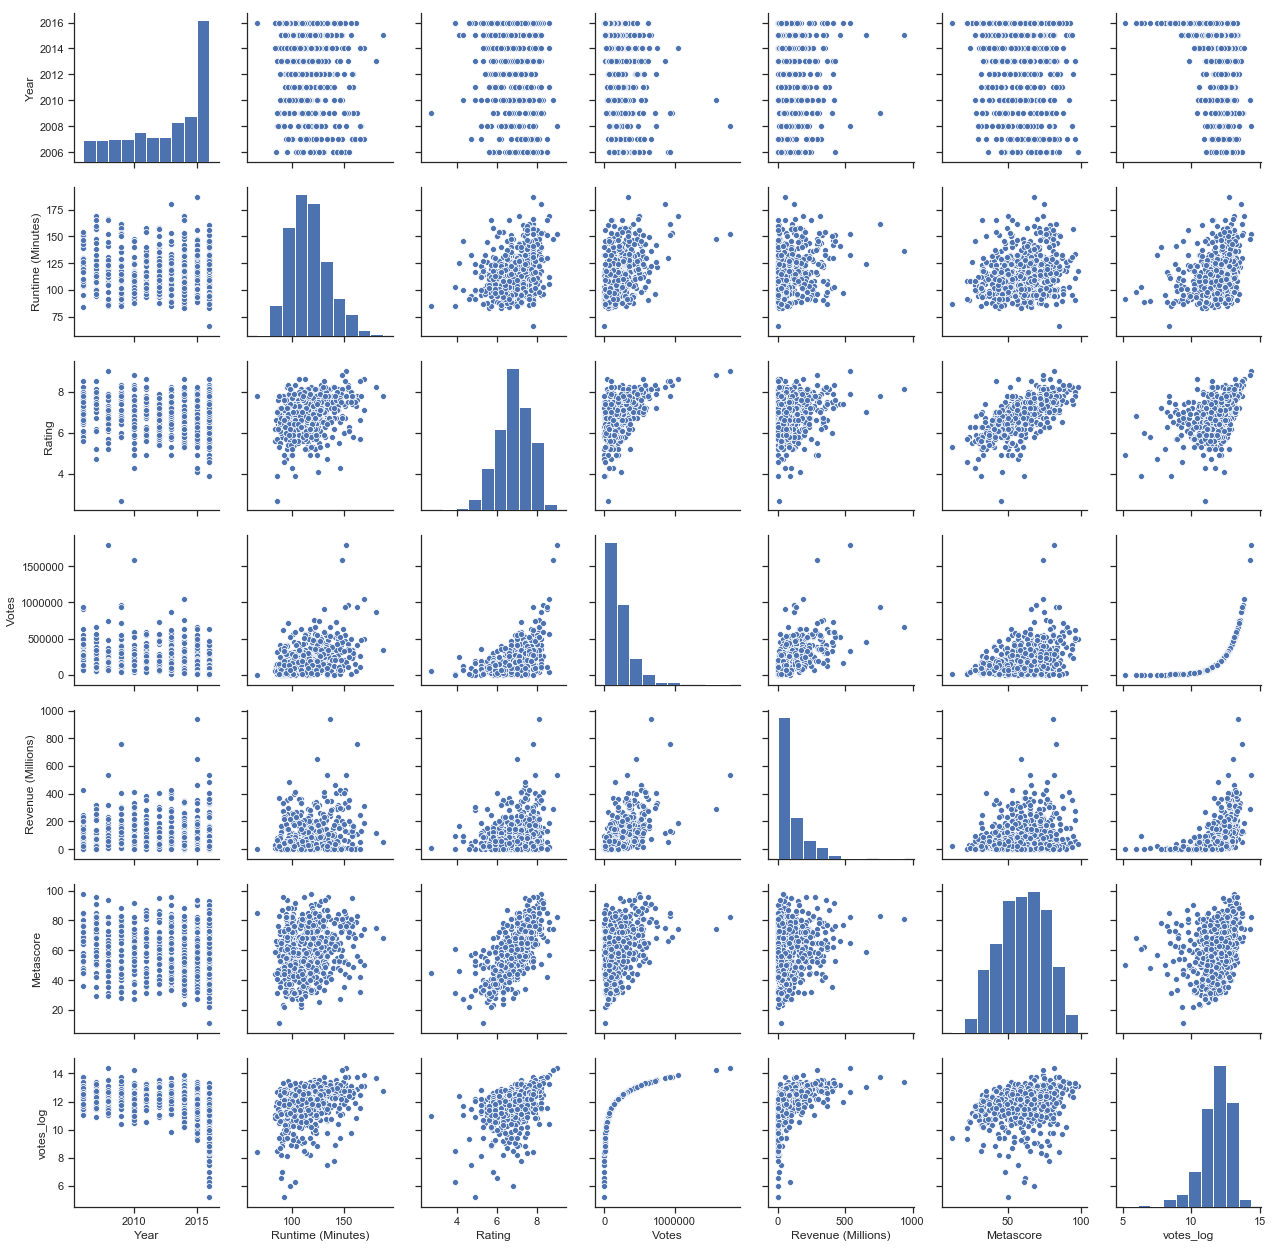

In [38]:
#Segunda analise de variaveis quantitativas ajustando a curva do Votes para uma reta usando log.

sns.set(style="ticks")

x_vars = ["Year","Runtime (Minutes)","Rating","Votes","Revenue (Millions)","Metascore",'votes_log']
y_vars = x_vars
sns.pairplot(dados_na, x_vars=x_vars, y_vars=y_vars)

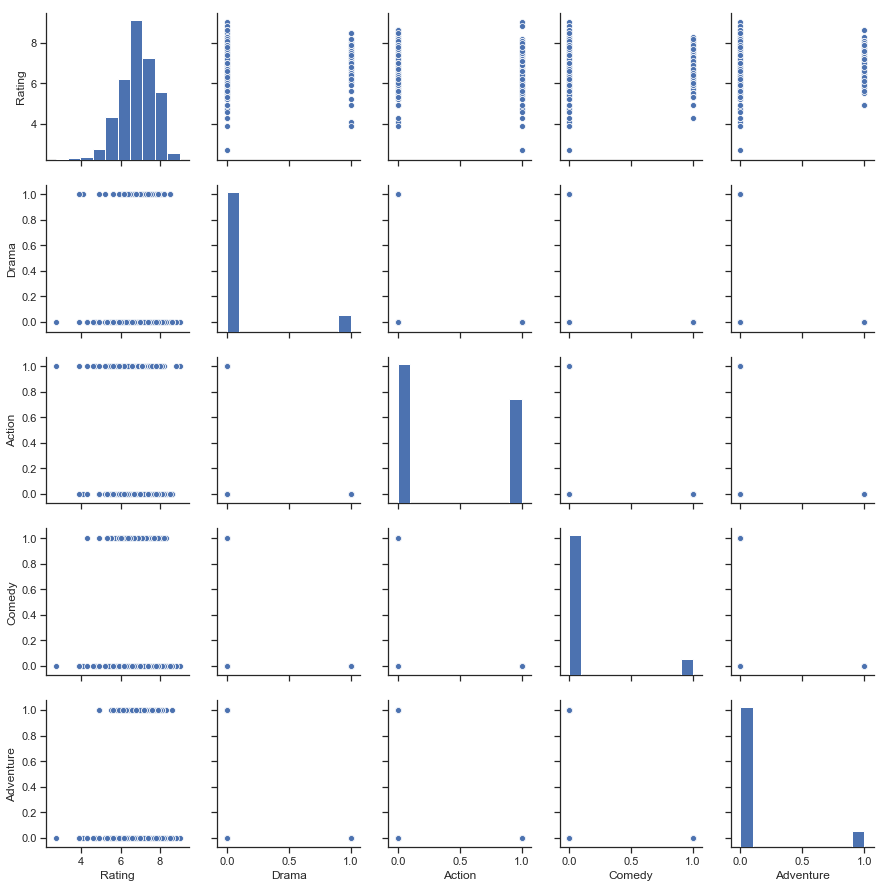

In [69]:
#Comecamos a iteracao do modelo onde veemos ambos variaveis quantitativas e qualitativas.

sns.set(style="ticks")

x_vars_quali = ["Rating",'Drama', 'Action', 'Comedy', 'Adventure']
y_vars_quali = x_vars_quali
sns.pairplot(dados_na, x_vars=x_vars_quali, y_vars=y_vars_quali)

# Método Regressão:

### Separando Treino e Teste:

In [88]:
#Dividimos o a amostra entre teste e treino, sendo 75% treino

X = dados_na[["Year","Runtime (Minutes)","Votes","Revenue (Millions)","Metascore",'votes_log']]
y = dados_na["Rating"]
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = RANDOM_SEED)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((435, 6), (145, 6), (435,), (145,))

In [40]:
def regress (X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [41]:
Y = y_train
X = X_train
results = regress(X,Y)

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     140.2
Date:                Thu, 21 Nov 2019   Prob (F-statistic):           9.70e-98
Time:                        14:15:57   Log-Likelihood:                -317.24
No. Observations:                 435   AIC:                             648.5
Df Residuals:                     428   BIC:                             677.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -36.5197     17.103     -2.135      0.033     -70.136      -2.903
Year                   0.0196      0.008      2.318      0.021       0.003       0.036
Runtime (Minutes)      0.0038      0.001      2.626      0.009       0.001       0.007
Votes               1.113e-06   2.08e-07      5.356      0.000    7.05e-07    1.52e-06
Revenue (Millions)    -0.0013      0.000     -4.607      0.000      -0.002      -0.001
Metascore              0.0324      0.002     20.158      0.000       0.029       0.036
votes_log              0.1309      0.033      3.968      0.000       0.066       0.196
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.584
Skew:                          -0.535   Prob(JB):                     7.87e-21
Kurtosis:                       4.991   Cond. No.                     2.08e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observando a tabela acima e possivel identificar que o P esta muito baixo, menos de 5%, o que mostra que todos os dados utilizados nao estao proximos uns dos outros o que mostra que todas as variaveis quantitativas nos ajudam a chegar a uma conclusao e que para iterar o modelo precisamos adicionar variaveis e nao tirar-las.

In [42]:
teste_var = sm.add_constant(X_test)

teste = results.predict(teste_var)

In [43]:
from sklearn.metrics import mean_squared_error

quant_qualidade = (mean_squared_error(y_test,teste))**(1/2)
#Aqui fazemos uma analise onde veemos a qualidade de nosso modelo onde calculamos a diferenca entre o valor real e o valor 
#previsto

quant_qualidade

0.5931484300468824

### Separando uma nova treino e teste, incluindo a variável gênero

Agora iremos add variaveis qualitativas para ver como que isso muda o modelo. Incuimos o genero principal de cada filme

In [44]:
dados_na[['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime','Drama','Horror',"Mystery"]] = pd.get_dummies(dados_na.genero1)

#fazemos o get dummies para transormar a variavel qualitativa em uma quantitativa


C:\Users\lfcsa\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


E interessante observar a primeira linha sobre tudo que nos mostra se filmes de certo genero tem ratings maiores 

In [46]:
#Separamos novamente as amostras nas bases de treino e de teste para prever o rating. 

X2 = dados_na[["Year","Runtime (Minutes)","Votes","Revenue (Millions)","Metascore",'votes_log','Drama', 'Action', 'Comedy', 'Adventure']]
y2 = dados_na["Rating"]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size = 0.25, random_state = RANDOM_SEED)

X_train_2.shape, X_test_2.shape, y_train_2.shape, y_test_2.shape

((435, 10), (145, 10), (435,), (145,))

In [47]:
Y2 = y_train_2
X2 = X_train_2
results2 = regress(X2,Y2)

results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     92.12
Date:                Thu, 21 Nov 2019   Prob (F-statistic):          9.80e-100
Time:                        14:16:08   Log-Likelihood:                -302.55
No. Observations:                 435   AIC:                             627.1
Df Residuals:                     424   BIC:                             671.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -37.9247     16.730     -2.267      0.024     -70.810      -5.040
Year                   0.0204      0.008      2.470      0.014       0.004       0.037
Runtime (Minutes)      0.0044      0.001      3.140      0.002       0.002       0.007
Votes               1.213e-06   2.03e-07      5.969      0.000    8.14e-07    1.61e-06
Revenue (Millions)    -0.0014      0.000     -5.027      0.000      -0.002      -0.001
Metascore              0.0304      0.002     17.759      0.000       0.027       0.034
votes_log              0.1290      0.032      3.992      0.000       0.065       0.193
Drama                 -0.3667      0.086     -4.267      0.000      -0.536      -0.198
Action                -0.2977      0.064     -4.631      0.000      -0.424      -0.171
Comedy                -0.2752      0.085     -3.238      0.001      -0.442      -0.108
Adventure             -0.2137      0.087     -2.460      0.014      -0.384      -0.043
==============================================================================
Omnibus:                       42.563   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.102
Skew:                          -0.572   Prob(JB):                     9.01e-19
Kurtosis:                       4.810   Cond. No.                     2.09e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observando a tabela acima e possivel identificar que o P continua muito baixo, menos de 5%, o que mostra que todos os dados utilizados nao estao proximos uns dos outros o que mostra que todas as variaveis quantitativas e qualitativas nos ajudam a chegar a uma conclusao.

In [63]:
teste_var_quali = sm.add_constant(X_test_2)

teste_quali = results2.predict(teste_var_quali)

quali_qualidade = (mean_squared_error(y_test_2,teste_quali))**(1/2)
#Aqui fazemos novamente uma analise onde veemos a qualidade de nosso modelo onde calculamos a diferenca entre o valor 
#real e o valor previsto
quali_qualidade

0.5815734910290906

# Método Random Forest (Com Gênero na Amostra):

In [81]:
model_F = RandomForestRegressor(n_estimators=100)
model_F.fit(X_train_2, y_train_2)
y_pred_3 = model.predict(X_test_2)

testeF = sm.add_constant(X_test_2)

forest_qualidade = (mean_squared_error(y_test_2,y_pred_3))**(1/2)
forest_qualidade


0.6255188852960948

In [91]:
#Criamos uma tabela para ver mais facilmente o resultado das diferentes amostras.

dic = {"Tipo de Amostra":["Sem Quali (sem generos)", "Toda (com generos)", "Teste Forest(com generos)"],
      "Teste MSE":[quant_qualidade,quali_qualidade,forest_qualidade]}

qualidade = pd.DataFrame(dic)


# Conclusão:

In [92]:
qualidade

,Tipo de Amostra,Teste MSE
0,Sem Quali (sem generos),0.593148
1,Toda (com generos),0.581573
2,Teste Forest(com generos),0.625519
